In [26]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from collections import Counter

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

In [27]:
attack = 'Ran'
dfs = {}

In [28]:
N_values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005, 0.00025]
max_seed = 5000

In [29]:
for i, (N, p) in list(enumerate(zip(N_values, p_values)))[:-1]:
    print(N)

    Ngcc_values = []
    Nsec_values = []
    meanS_values = []
    meanS2_values = []
    
    for seed in range(max_seed):
        network_base = 'ER_N{}_p{}'.format(N, p)
        network = network_base + '_{:05d}'.format(seed)
        attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)
        
        full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
        if not os.path.isfile(full_file_name):
            continue
        #else:
        #    print(seed)
        aux = np.loadtxt(full_file_name, dtype=float)
        _Ngcc_values = np.append(aux[:,0], np.repeat(np.NaN, (N-len(aux[:,0]))))
        _Nsec_values = np.append(aux[:,1], np.repeat(np.NaN, (N-len(aux[:,1]))))
        _meanS_values = np.append(aux[:,2], np.repeat(np.NaN, (N-len(aux[:,2])))) 
        _meanS2_values = np.append(aux[:,3], np.repeat(np.NaN, (N-len(aux[:,3])))) 

        Ngcc_values.append(_Ngcc_values)
        Nsec_values.append(_Nsec_values)
        meanS_values.append(_meanS_values)
        meanS2_values.append(_meanS2_values)
        
    d = {'t': np.arange(N)/N,  'Sgcc': np.nanmean(Ngcc_values, axis=0)/N, 
         'varSgcc': np.nanvar(Ngcc_values, axis=0)/np.nanmean(Ngcc_values, axis=0), 
         'Nsec': np.nanmean(Nsec_values, axis=0), 'meanS': np.nanmean(meanS_values, axis=0),
         'meanS2': np.nanmean(meanS2_values, axis=0)}
    df = pd.DataFrame(data=d)
    dfs[N] = df

125


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice


250
500
1000


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Degrees of freedom <= 0 for slice.
/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice


2000
4000
8000


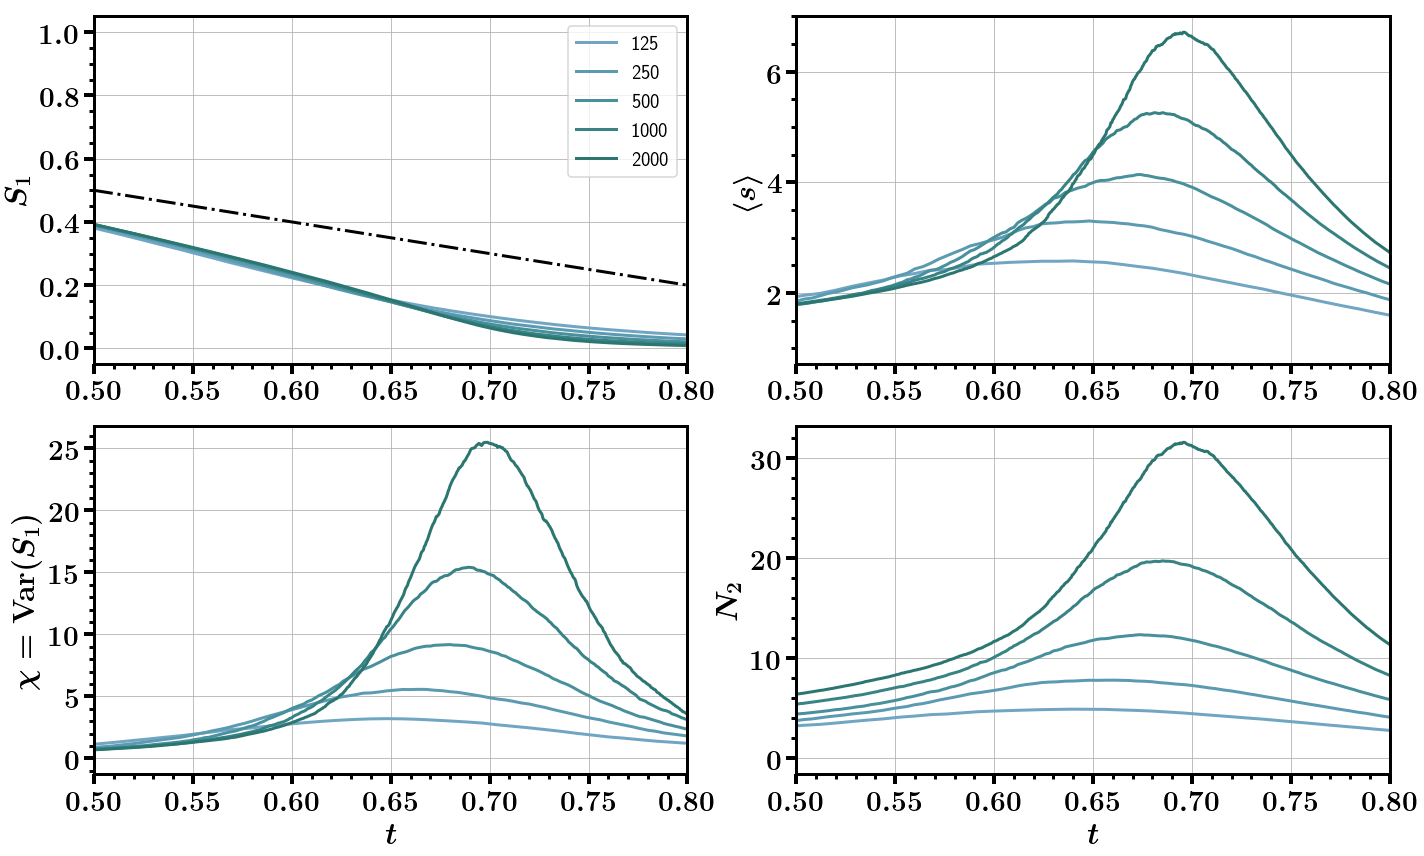

In [34]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values[:-3]

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0.5, 0.8)
    ax.grid(True)

ax = axes[0][0]
ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/dfs[N]['Sgcc'][0], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][0]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['varSgcc'])
ax.set_ylabel(r'$\chi = \mathrm{Var}(S_1) $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Nsec'])
ax.set_ylabel(r'$N_2$')

axes[1][0].set_xlabel(r'$t$')
axes[1][1].set_xlabel(r'$t$')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_Ran')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

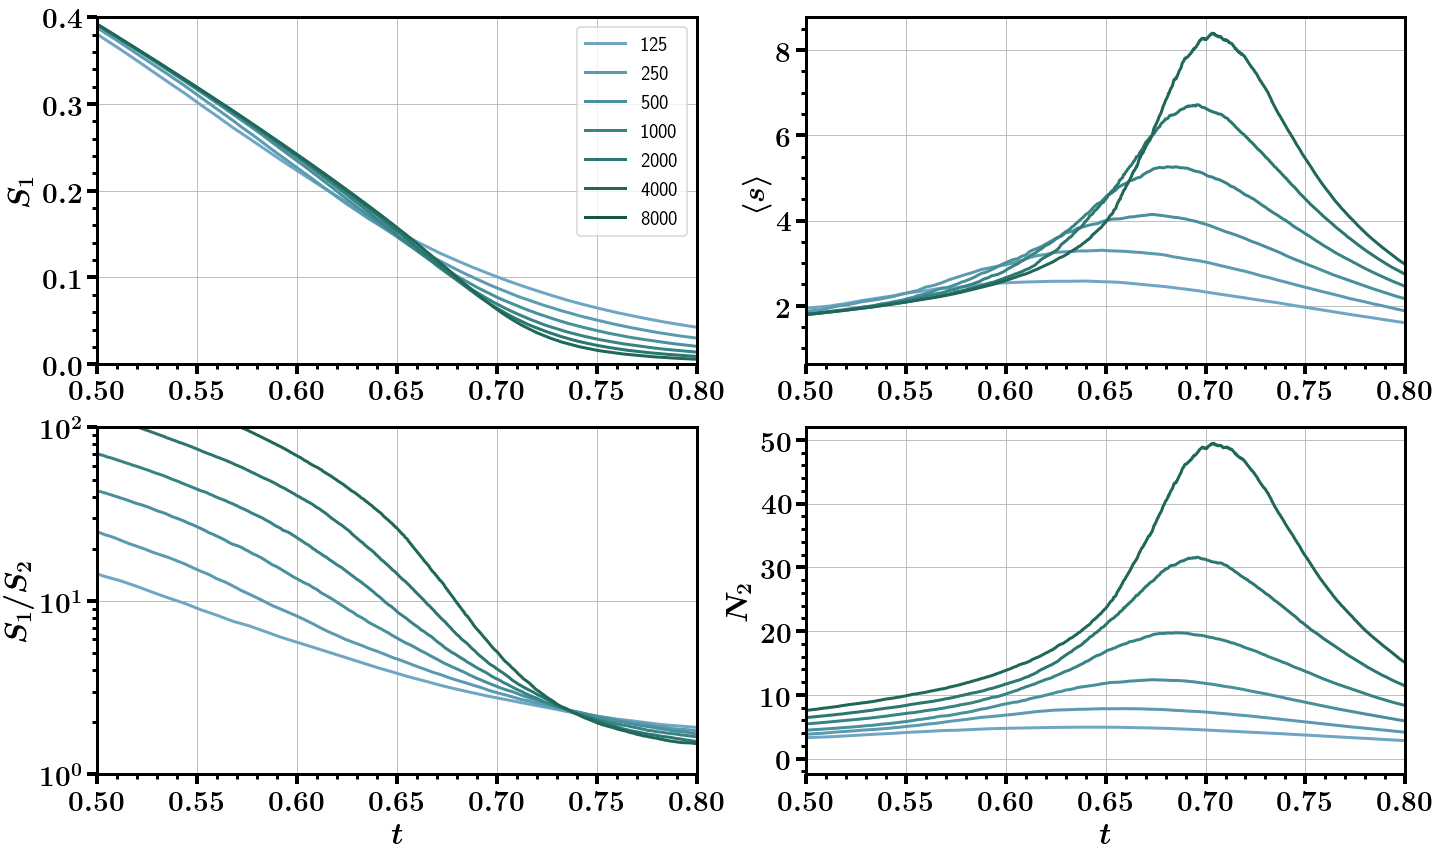

In [35]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

t_c = 0.227
_N_values = N_values[:-1]

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0.5, 0.8)
    ax.grid(True)

ax = axes[0][0]
ax.set_ylim(0, 0.4)
ax.axvline(t_c, color='k', linestyle='--')
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/dfs[N]['Sgcc'][0], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][0]
ax.set_yscale('log')
ax.set_ylim(1, 100)
#ax.set_xlim(0.22, 0.23)
ax.axvline(t_c, color='k', linestyle='--')
for N in _N_values:
    ax.plot(dfs[N]['t'], N*dfs[N]['Sgcc']/dfs[N]['Nsec'])
ax.set_ylabel(r'$S_1/S_2$')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[N]['t'], dfs[N]['Nsec'])
ax.set_ylabel(r'$N_2$')

axes[1][0].set_xlabel(r'$t$')
axes[1][1].set_xlabel(r'$t$')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_ran2')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

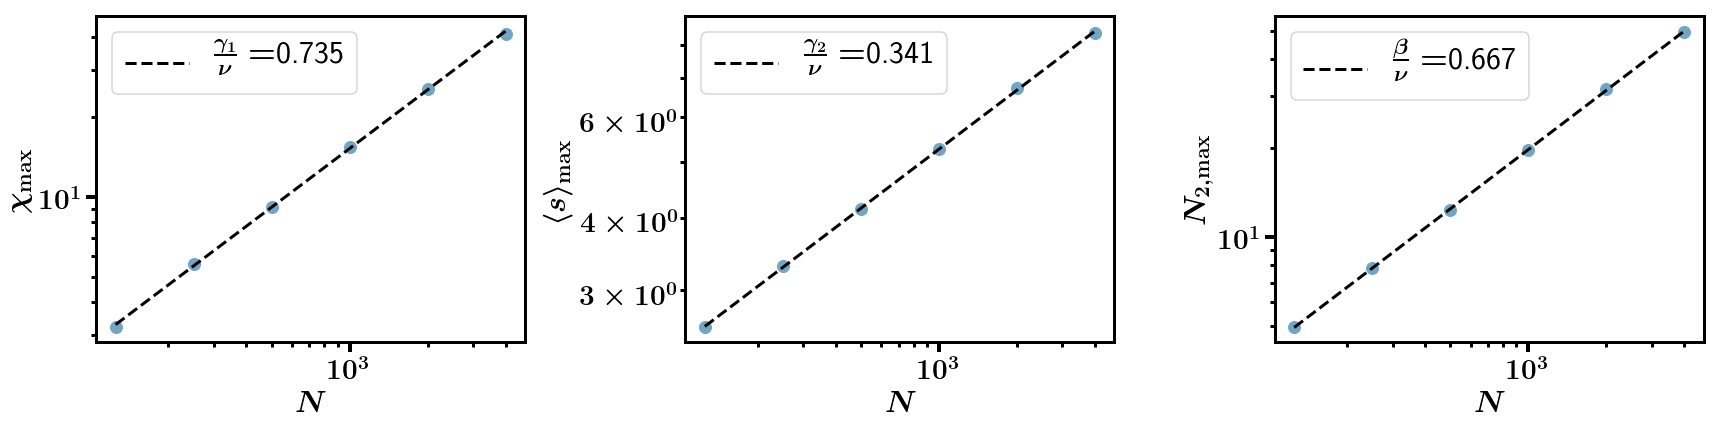

In [43]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgcc', 'meanS2', 'Nsec']

_N_values = N_values[:-2]

peaks = {}
slopes = {}
Y_preds = {}
for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)       
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$N$")    
    
for ax, measure in zip(axes, measures):
    ax.plot(_N_values, peaks[measure], 'o', markersize=12)
    
axes[0].plot(_N_values, np.exp(Y_preds['varSgcc']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_1}{\nu} = $" + '{:.3f}'.format(slopes['varSgcc']))
axes[0].legend(loc='best', fontsize=32)    
axes[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

axes[1].plot(_N_values, np.exp(Y_preds['meanS2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_2}{\nu} = $" + '{:.3f}'.format(slopes['meanS2']))
axes[1].legend(loc='best', fontsize=32)    
axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   

axes[2].plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
        label=r"$\frac{\beta}{\nu} = $" + '{:.3f}'.format(slopes['Nsec']))
axes[2].legend(loc='best', fontsize=32)    
axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")   

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peaks_Ran')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

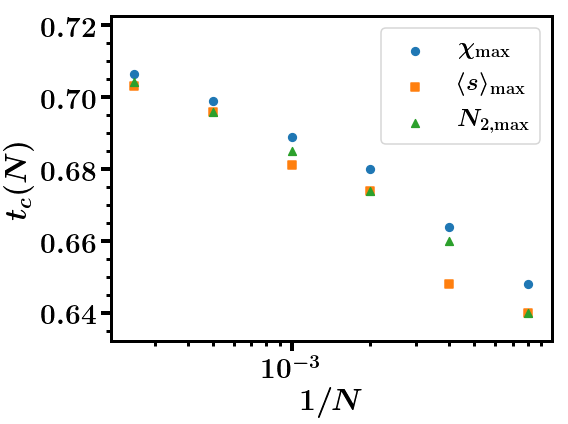

In [45]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

measures = ['varSgcc', 'meanS2', 'Nsec']

_N_values = N_values[:-2]

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[N][measure].idxmax()
        Y = dfs[N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
labels = [r"$\chi_{\mathrm{max}}$", r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
    ax.scatter(1/np.array(_N_values), tc_values[measure], marker=markers[i], 
               color=colors[i], s=60, label=labels[i])

ax.set_ylabel(r'$t_c(N)$')
#ax.set_ylim(0.21, 0.23)
#[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

#axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   
    
#axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")  
ax.legend(loc='best', fontsize=24)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'tc_Ran')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

In [93]:
import fssa

_N_values = [125, 250, 500, 1000, 2000, 4000]
Nmax = 4000
n_samples = len(_N_values)
rho = np.linspace(0, 1, Nmax)

a = np.zeros((n_samples, Nmax))
for i, N in enumerate(_N_values):
    for j in range(Nmax):
        a[i][j] = np.interp(j/Nmax, np.arange(N)/N, dfs[N]['Sgcc'])

rho = rho[int(0.6*Nmax):int(0.8*Nmax)]
a = a[:, int(0.6*Nmax):int(0.8*Nmax)]
da = 0.1*a

In [86]:
_N_values = [125, 250, 500, 1000, 2000, 4000]
Nmin = min(_N_values)
n_samples = len(_N_values)
rho2 = np.linspace(0, 1, Nmin)

a2 = np.zeros((n_samples, Nmin))
for i, N in enumerate(_N_values):
    step = N//Nmin
    for j in range(Nmin):
        a2[i][j] = dfs[N]['Nsec'][j*step]

rho2 = rho2[int(0.6*Nmin):int(0.8*Nmin)]
a2 = a2[:, int(0.6*Nmin):int(0.8*Nmin)]
da2 = 0.1*a2

0 0.2190272
1 0.22244399999999998
2 0.2300412
3 0.23430706141228244
4 0.23652289999999998
5 0.2373724


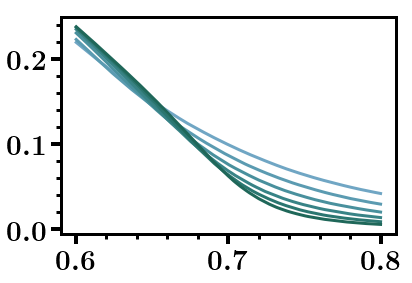

In [94]:
for i in range(n_samples):
    print(i, np.nanmax(a[i]))
    plt.plot(rho, a[i])

In [95]:
rho0 = 0.75
nu0 = 1
zeta0 = 1
ret = fssa.autoscale(_N_values, rho, a, da, rho0, nu0, zeta0)

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


In [88]:
rho0 = 0.75
nu0 = 1
zeta0 = 1
ret2 = fssa.autoscale(_N_values, rho2, a2, da2, rho0, nu0, zeta0)

In [96]:
auto_scaled_data = fssa.scaledata(_N_values, rho, a, da, ret.rho, ret.nu, ret.zeta)

In [97]:
# critical exponents and errors, quality of data collapse
print(ret.rho, ret.drho)
print(ret.nu, ret.dnu)
print(ret.zeta, ret.dzeta)
print(ret.fun)

0.7299846633245755 0.007701419757077845
2.942775471122876 0.11883496447927765
-0.8725805377168026 0.10837884291962668
0.006869294101016951


In [90]:
# critical exponents and errors, quality of data collapse
print(ret2.rho, ret2.drho)
print(ret2.nu, ret2.dnu)
print(ret2.zeta, ret2.dzeta)
print(ret2.fun)

0.7436796048902521 0.0046540825886116416
2.9321787804630843 0.25895056048249476
1.9401202553230255 0.1515042667041549
0.008965810570313726


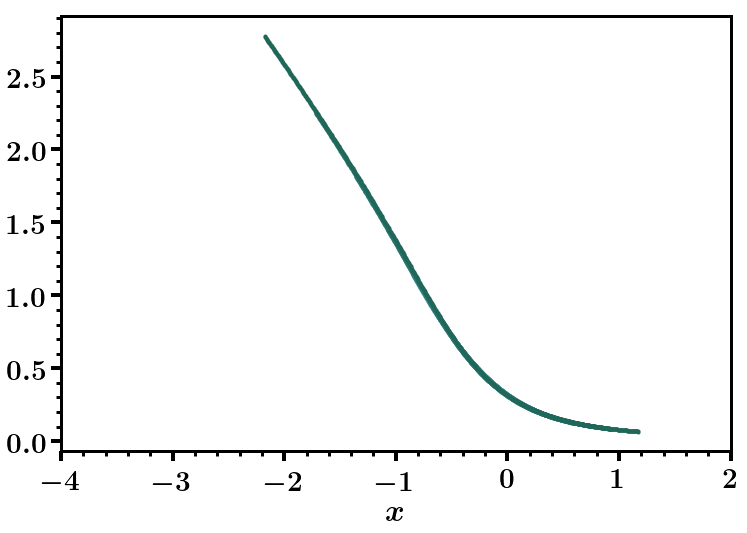

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_prop_cycle(cycler('color', palette))
ax.plot(
    auto_scaled_data.x.T, auto_scaled_data.y.T,
    '.',
)
ax.set_xbound(-4, 2)
ax.set_xlabel(r'$x$')
plt.show()

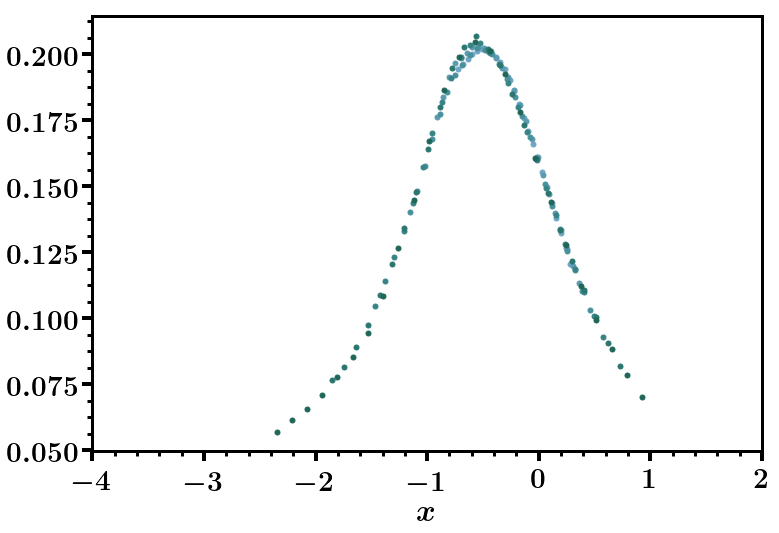

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_prop_cycle(cycler('color', palette))
ax.plot(
    auto_scaled_data.x.T, auto_scaled_data.y.T,
    '.', markersize=10,
)
ax.set_xbound(-4, 2)
ax.set_xlabel(r'$x$')
plt.show()

In [189]:
import pickle
import bz2

def counterToList(counter):

    try:
        counter[0][0]
    except:
        return [counter[0]]

    lst = []
    for s, ns in counter:
        lst += [s]*ns
    return sorted(lst, reverse=True)[1:]

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

N = 2000
p = 0.002
seeds = range(2000)

f_values_by_attack = {'BtwU': [0.15, 0.2, 0.22, 0.228, 0.25, 0.30]}

all_comp_sizes_dict = {}
all_comp_sizes_dict[attack] = {}
all_comp_sizes_lst = []

for f_value in f_values_by_attack[attack]:
    print(f_value)
    all_comp_sizes_dict[attack][f_value] = []
    for seed in seeds:     

        network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
        #print(network)
        network_file = network + '.txt'
        full_network_path = os.path.join(net_dir_name, network, network_file)

        attack_dir_name = os.path.join(net_dir_name, network, attack)

        comp_sizes_file  = os.path.join(attack_dir_name, 'componentSizes.pickle.bz2')
        with bz2.BZ2File(comp_sizes_file, 'r') as f:
            comp_sizes_values = pickle.load(f)

        comp_sizes = comp_sizes_values[int(N*f_value)]
        comp_sizes_lst = counterToList(comp_sizes)
        if len(comp_sizes_lst) == 1:
            continue

        all_comp_sizes_dict[attack][f_value] += comp_sizes_lst

0.15
0.2
0.22
0.228
0.25
0.3


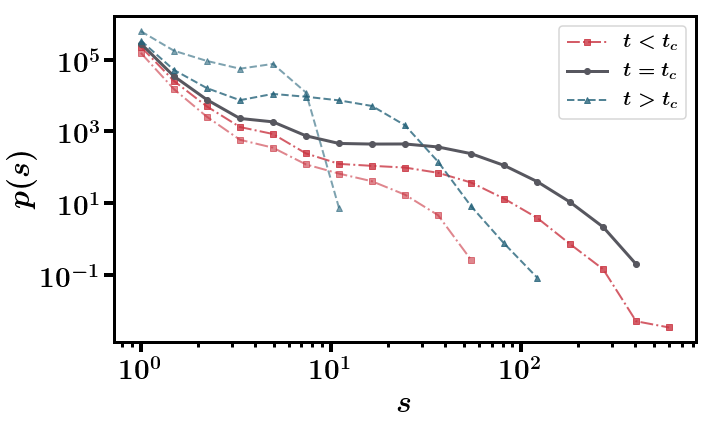

In [190]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

labels = ['', r'$t < t_c$', r'$t = t_c$', r'$t > t_c$', '']
linestyles = ['-.', '-.', '-', '--', '--']
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

attack = 'BtwU'

_colors = ['#ca3542', '#ca3542', '#57575f', '#27647b', '#27647b']
_markers = ['s', 's', 'o', '^', '^']
_alphas = [0.6, 0.8, 1, 0.8, 0.6]
_linewidths = [2, 2, 3, 2, 2]
ax0 = axes
for i, f_value in enumerate([0.15, 0.20, 0.228, 0.25, 0.3]):
    Y = all_comp_sizes_dict[attack][f_value]
    hist = np.histogram(Y, bins=bins)
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    ax0.plot(bins[:-1], hist_norm, label=labels[i], linestyle=linestyles[i], marker=_markers[i], 
             color=_colors[i], alpha=_alphas[i], linewidth=_linewidths[i])

ax0.set_xlabel(r'$s$')
ax0.set_ylabel(r'$p(s)$')
ax0.legend(loc='best', fontsize=20)
ax0.set_xscale('log')
ax0.set_yscale('log')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'comp_sizes')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

In [24]:
attacks = ['BtwU', 'DegU', 'Ran']
Sgcc_values = {}
N = 8000
p = 0.0005
for attack in attacks:

    print(attack)
    seeds = range(18)
    
    Sgcc_values[attack] = np.zeros(shape=(len(seeds), N))
 
    for seed in seeds:
        network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
        attack_dir_name = os.path.join(net_dir_name, network, attack)
        
        full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
        aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
        _Sgcc_values = aux[:,0] / N   
        Sgcc_values[attack][seed] = _Sgcc_values
        
    Sgcc_values[attack] = np.nanmean(Sgcc_values[attack], axis=0)

BtwU


OSError: ../networks/ER/ER_N8000_p0.0005_00000/BtwU/Ngcc_values.txt not found.

In [92]:
N = 2000
p = 0.002
network =  'ER_N{}_p{}'.format(N, p)
t_values = [0.0, 0.05, 0.10, 0.15, 0.20, 0.21, 0.215, 0.22, 0.225, 0.23]

btw_dist = {}
btw_dist_data = {}
for i, t in enumerate(t_values):
    print(t)
    file_name = "../networks/ER/" + network + "/btw_data_" + network + "_t{:.6f}.txt".format(t)
    btwSeq = np.loadtxt(file_name)

    mask = btwSeq > 0
    btwSeq = btwSeq[mask]       
    #btwSeq = btwSeq/np.mean(btwSeq)

    minb = min(btwSeq)
    maxb = max(btwSeq)
    
    meanb = np.mean(btwSeq)
    stdb = np.std(btwSeq)
    meanb2 = np.mean(btwSeq**2)

    bins = np.linspace(minb, maxb, 20)

    hist = np.histogram(btwSeq, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    
    btw_dist[t] = [bins, hist_norm]
    btw_dist_data[t] = [minb, maxb, meanb, stdb, meanb2]

0.0
0.05
0.1
0.15
0.2
0.21
0.215
0.22
0.225
0.23


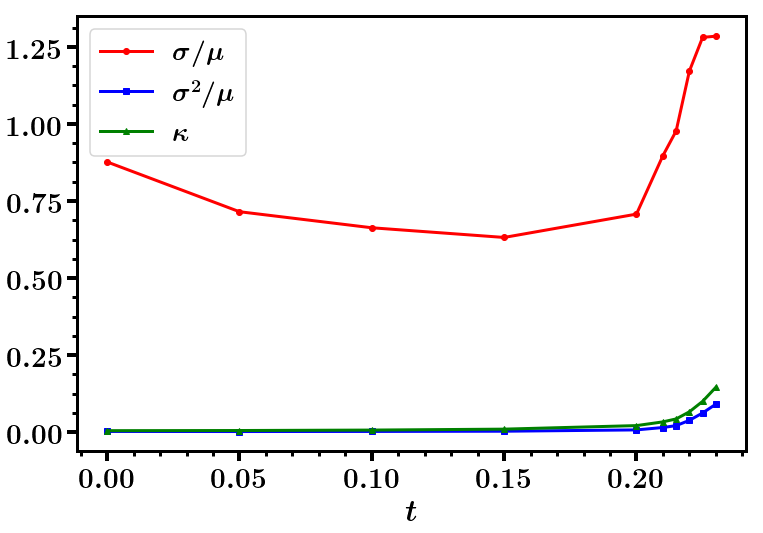

In [104]:
mean_values = []
mean2_values = []
std_values = []
for (t, data) in sorted(btw_dist_data.items(), key=lambda x: x[0]):
    mean_values.append(data[2])
    mean2_values.append(data[4])
    std_values.append(data[3])


mean_values = np.array(mean_values)
mean2_values = np.array(mean2_values)
std_values = np.array(std_values)
    
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(12*ncols, 8*nrows), ncols=ncols, nrows=nrows)
ax = axes
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$t$')
#ax.set_ylabel('$CV$')

X = t_values
Y = std_values / mean_values
Y2 = std_values**2 / mean_values
Y3 = mean2_values / mean_values
ax.plot(X, Y, 'o-', color='red', label=r'$\sigma / \mu$')
ax.plot(X, Y2, 's-', color='blue', label=r'$\sigma^2 / \mu$')
ax.plot(X, Y3, '^-', color='green', label=r'$\kappa$')
ax.legend(loc='best')
plt.show()

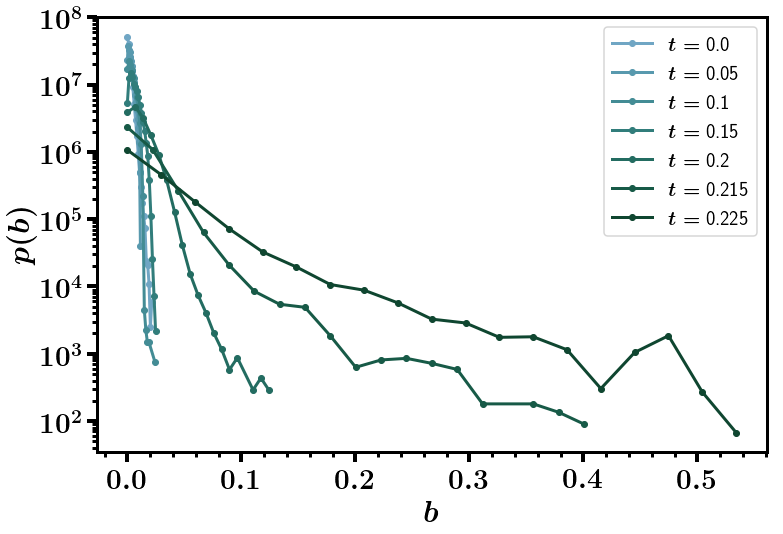

In [114]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(12*ncols, 8*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$b$')
#ax.set_xlim(0.0, 0.04)
ax.set_ylabel('$p(b)$')

def exp_strech(X, C, tau, beta):
    Y = C*np.exp(-(X/tau)**beta)
    return Y

X_strech = np.linspace(0, 0.6, 100)
Y_strech = exp_strech(X_strech, 10E7, 0.001, 0.4)

excluded = [0.21, 0.22, 0.23]
#excluded = []
    
for t in t_values:
    #if t != 0.05:
    #    continue
    #if t < 0.19:
    #    continue
    if t in excluded:
        continue
    bins, hist_norm = btw_dist[t]
    mask = ~np.isnan(hist_norm)
    X = bins[:-1]
    X = X[mask]
    Y = hist_norm[mask]
    ax.plot(X, Y, 'o-', label=r'$t = $' + ' {}'.format(t))

#ax.plot(X_strech, Y_strech, '--', color='k')
ax.legend(loc='best', fontsize=20)
plt.show()

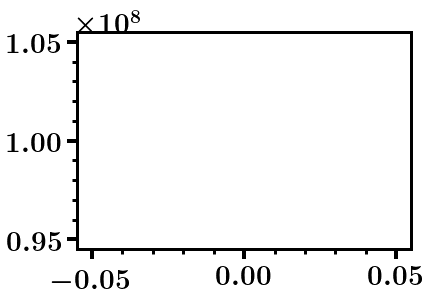

In [60]:
plt.plot(X_strech, Y_strech, '--', color='k')

In [75]:
#Y = C*np.exp(-(X/tau)**beta)
np.exp(-X_strech/1E-1)

array([1.        , 0.94119394, 0.88584603, 0.83375292, 0.78472319,
       0.73857671, 0.69514393, 0.65426525, 0.61579049, 0.57957828,
       0.54549556, 0.51341712, 0.48322508, 0.45480852, 0.42806302,
       0.40289032, 0.37919793, 0.35689879, 0.33591098, 0.31615738,
       0.29756541, 0.28006676, 0.26359714, 0.24809603, 0.23350648,
       0.21977488, 0.20685079, 0.19468671, 0.18323795, 0.17246245,
       0.16232061, 0.15277518, 0.14379107, 0.13533528, 0.12737675,
       0.11988622, 0.11283619, 0.10620074, 0.09995549, 0.0940775 ,
       0.08854517, 0.08333818, 0.07843739, 0.0738248 , 0.06948345,
       0.0653974 , 0.06155164, 0.05793203, 0.05452528, 0.05131886,
       0.048301  , 0.04546061, 0.04278725, 0.0402711 , 0.03790291,
       0.03567399, 0.03357615, 0.03160167, 0.0297433 , 0.02799421,
       0.02634798, 0.02479856, 0.02334025, 0.02196771, 0.02067587,
       0.01946001, 0.01831564, 0.01723857, 0.01622484, 0.01527072,
       0.01437271, 0.0135275 , 0.01273201, 0.01198329, 0.01127

In [61]:
Y_strech

array([1.e+08])

In [67]:
np.linspace(0, 0.6, 100)

array([0.        , 0.00606061, 0.01212121, 0.01818182, 0.02424242,
       0.03030303, 0.03636364, 0.04242424, 0.04848485, 0.05454545,
       0.06060606, 0.06666667, 0.07272727, 0.07878788, 0.08484848,
       0.09090909, 0.0969697 , 0.1030303 , 0.10909091, 0.11515152,
       0.12121212, 0.12727273, 0.13333333, 0.13939394, 0.14545455,
       0.15151515, 0.15757576, 0.16363636, 0.16969697, 0.17575758,
       0.18181818, 0.18787879, 0.19393939, 0.2       , 0.20606061,
       0.21212121, 0.21818182, 0.22424242, 0.23030303, 0.23636364,
       0.24242424, 0.24848485, 0.25454545, 0.26060606, 0.26666667,
       0.27272727, 0.27878788, 0.28484848, 0.29090909, 0.2969697 ,
       0.3030303 , 0.30909091, 0.31515152, 0.32121212, 0.32727273,
       0.33333333, 0.33939394, 0.34545455, 0.35151515, 0.35757576,
       0.36363636, 0.36969697, 0.37575758, 0.38181818, 0.38787879,
       0.39393939, 0.4       , 0.40606061, 0.41212121, 0.41818182,
       0.42424242, 0.43030303, 0.43636364, 0.44242424, 0.44848